# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
# * import sys
# Importa el módulo sys, que es un módulo de la biblioteca estándar de Python.
# Este módulo proporciona acceso a variables y funciones que interactúan fuertemente con el
# intérprete de Python, como la manipulación de la ruta de búsqueda de módulos y la entrada/salida
# estándar, entre otros.
# * sys.path
# Es una lista que contiene las rutas en las que el intérprete de Python busca los módulos cuando
# usas import. Al intentar importar un módulo, Python busca en las rutas especificadas en esta
# lista.
# * sys.path.insert(0, '..')
# Inserta la ruta '..' (que representa el directorio padre) al inicio de la lista sys.path.
# Al agregarla en la posición 0, se asegura que cuando Python busque módulos para importar,
# primero verifique en el directorio padre antes de continuar con las rutas predeterminadas.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [2]:
# * from python_environment_check import check_packages
# Importa la función check_packages desde el módulo python_environment_check. 
# Este módulo, por su nombre, parece estar diseñado para verificar que el entorno de Python 
# tenga instaladas las versiones correctas de ciertos paquetes.
# * d = {...}
# Define un diccionario d que contiene como claves los nombres de varios paquetes 
# (por ejemplo, numpy, scipy, matplotlib, etc.) y como valores las versiones mínimas 
# requeridas de esos paquetes.
# * check_packages(d)
# La función check_packages toma como entrada el diccionario d y probablemente realiza una 
# verificación en el entorno actual de Python para asegurarse de que las versiones instaladas 
# de estos paquetes sean al menos las especificadas en el diccionario. Si alguno de los paquetes 
# no está instalado o tiene una versión incorrecta, es posible que la función lance un error o 
# sugiera instalar/actualizar los paquetes.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[OK] numpy 1.26.4
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


# Example 2 - Land Mines Dataset

### Overview

- [Data Analysis](#data-analysis)
- [Logistic Regression](#logistic-regression)
- [SVM (Support Vector Machines)](#svm-support-vector-machines)
- [Decision Tree](#decision-tree)
- [Random Forests](#random-forests)
- [KNN (K-Nearest Neighbors)](#knn-k-nearest-neighbors)
- [Summary](#summary)

In [3]:
# * from IPython.display
# Importa desde el submódulo display del paquete IPython. Este módulo está diseñado para mostrar 
# y renderizar diferentes tipos de datos dentro de entornos interactivos, como Jupyter Notebooks.
# * import Image
# Importa la clase Image desde el módulo display. La clase Image se utiliza para mostrar 
# imágenes en el entorno interactivo (por ejemplo, en una celda de Jupyter Notebook).
# * %matplotlib inline
# Esto es una "magic command" (comando mágico) específico de IPython/Jupyter Notebook.
# Habilita la visualización de gráficos de matplotlib directamente dentro de las celdas del 
# notebook. Los gráficos se renderizan "en línea" (dentro del mismo cuaderno) sin necesidad 
# de abrir ventanas emergentes.

from IPython.display import Image
%matplotlib inline

# Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
dataset = pd.read_csv("land_mines_dataset.csv")

# Uses the pandas library, which is as pd, to read a CSV (Comma-Separated Values) file named "land_mines_dataset.csv".
# A CSV file stores data in a tabular format, with rows and columns, and is commonly used for exchanging and storing datasets.
# read_csv is a function from pandas used to load data from a CSV file into a DataFrame object.
# A DataFrame is a two-dimensional data structure provided by the pandas library.
pd.set_option('display.max_columns', len(dataset.columns))

# For pandas to adjust the maximum number of columns displayed to match the actual number of columns in the dataset.
dataset.head(1)

# This is a method called in the pandas library that is used to display the first 5 rows of a DataFrame.

# dataset.info()

# dataset.describe()

,V,H,S,M
0,0.338157,0.0,0.0,1


In [6]:
# Let's look at the exact column's name
dataset.columns

Index(['V', 'H', 'S', 'M'], dtype='object')

In [7]:
# INPUTS (INDEPENDENT VARIABLES)

# V (Voltage): Output voltage value of FLC sensor due to magnetic distortion. It's value goes from 0 V to 10.6 V.

# H (High): The height of the sensor from the ground.

# S (Soil Type): There are 6 different soil types depending on the moisture condition.
# - Type 1: Dry And Sandy
# - Type 2: Dry And Humus
# - Type 3: Dry And Limy
# - Type 4: Humid And Sandy
# - Type 5: Humid And Humus
# - Type 6: Humid And Limy

# OUTPUT (DEPENDENT VARIABLE)

# M (Mine Type): There are 5 different mine types commonly encountered on land.
# - Type 1: Null
# - Type 2: Anti-Tank
# - Type 3: Anti-personnel
# - Type 4: Booby Trapped Anti-personnel
# - Type 5: M14 Anti-personnel

In [8]:
dataset_anonymized = dataset.drop(["M"], axis=1)

# dataset refers to the original pandas DataFrame that contains the dataset, including all its columns and rows.
# .drop() is a method provided by pandas to remove specified labels fromrows or columns in a DataFrame.
# It returns a new DataFrame with the specified column removed.

dataset_anonymized.to_csv('dataset_anonymized.csv', index=False)

# save a pandas DataFrame to a CSV (Comma-Separated Values) file.

dataset_anonymized.corr()

# dataset_anonymized refers to the pandas DataFrame that has already been processed.
# .corr() is a method that calculates the pairwise correlation of all numeric columns in the DataFrame.
# It returns a new DataFrame (correlation matrix) that shows the correlation coefficients between each
# pair of numeric columns.
# By default, it calculates the Person correlation coefficient, but it can aldo compute Kendall and Spearman
# correlation coefficients it specified.

# dataset.corr()

# https://en.wikipedia.org/wiki/Person_correlation_coefficient

,V,H,S
V,1.000000,-0.377523,0.070673
H,-0.377523,1.000000,-0.006957
S,0.070673,-0.006957,1.000000


In [9]:
# dataset = dataset.rename(columns=["V":"Voltage", "H":"Height", "S":"Soil", "M":"Mine"])
# The rename() method is a function provided by pandas that allows you to change to rename the columns of the DataFrame.

# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1]
# print(X)
# print(y)

# The variables X (anonymized dataset) and y (characteristic M) are defined and all mine types are printed.

X = dataset_anonymized
y = dataset.get("M")
print('Class labels:', np.unique(y))

Class labels: [1 2 3 4 5]


<AxesSubplot:>

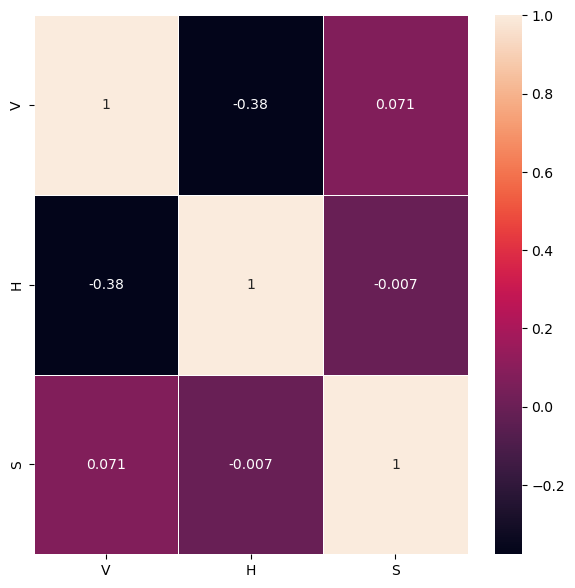

In [10]:
# Knowing this, the variable X is observed in more detail, from which its correlation is calculated.

import seaborn as sb
fig, ax = plt.subplots(figsize=(7,7))
sb.heatmap(dataset_anonymized.corr(), linewidth = 0.5, annot=True)

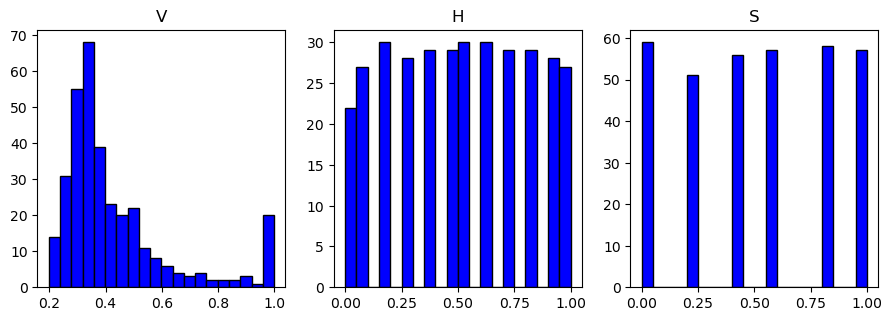

In [11]:
columns = dataset_anonymized.columns

# columns = dataset_anonymized.columns retrieves the names of the columns in the dataset_anonymized DataFrame
# and stores them in the variable columns.

fig = plt.figure(figsize=(9,9))
# This line creates a new figure for plotting. The figsize parameter sets the size of the figure to 9 inches by 9 inches.

for i in range(0,3):

  ax = plt.subplot(3,3,i+1)

  # This line creates a subplot within the figure. The subplot(3, 3, i+1) indicates that the figure will be divided
  # into a grid of 3 rows and 3 columns, and the current subplot being created is indexed as i+1.
  ax.hist(dataset_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  # This line generates a histogram for the i-th column in dataset_anonymized.CGPA

  ax.set_title(dataset_anonymized.head(0)[columns[i]].name)
  # This line sets title of current subplot to the name of the column being plotted.

plt.tight_layout()
# This function adjusts the padding between and around subplot in the figure.

plt.show()
# This line displays the figure

In [12]:
from sklearn.model_selection import train_test_split # splitting
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=1, stratify=y)

# Separates the train and test datasets

In [13]:
# This function counts the number of times each integer value appears in the y array. 
# In this case, y contains the class labels (0, 1, 2) of the entire data set.
# The result is a list in which each position corresponds to a tag, and the value in 
# that position indicates how many times that tag appears in y.
print('Labels counts in y:', np.bincount(y))

# Similar to the previous case, this line counts the occurrences of each tag in the set 
# training (y_train), which was obtained after splitting the data with train_test_split.
# Since the stratify parameter was used when splitting the data, the tag count in y_train 
# will maintain the proportions of the original classes.
print('Labels counts in y_train:', np.bincount(y_train))

# Here we count how many times each label appears in the test set (y_test).
# Again, the proportions of the classes in y_test will be the same as in the data 
# originals due to the use of stratify.
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 0 71 70 66 66 65]
Labels counts in y_train: [ 0 53 52 50 49 49]
Labels counts in y_test: [ 0 18 18 16 17 16]


In [14]:
# The StandardScaler class is imported from the sklearn.preprocessing module. This class is used 
# to standardize features, that is, make the data have a mean of 0 and a 
# standard deviation of 1.
from sklearn.preprocessing import StandardScaler

# A StandardScaler instance called sc is created. This object will be used to adjust 
# (calculate the parameters) and transform the data.
sc = StandardScaler()

# The fit(X_train) method fits the scaler using the training data (X_train). 
# During this process, the StandardScaler calculates the mean and standard deviation of each 
# feature in X_train. These values ​​are stored and will be used later to 
# transform both training and test data.
sc.fit(X_train)

# The transform(X_train) method uses the mean and standard deviation values 
# calculated in the previous step to transform the features of X_train. Each value 
# of X_train features are standardized by subtracting the mean and dividing by the 
# standard deviation. The result is a new data set X_train_std, where the 
# features have a mean of 0 and a standard deviation of 1.
X_train_std = sc.transform(X_train)

# The same transformation is applied to the test data (X_test) using the parameters 
# of standardization (mean and standard deviation) calculated from the set of 
# training. This ensures that transformations on the test data are 
# consistent with those of the training set. The result is the standardized set 
# X_test_std.
X_test_std = sc.transform(X_test)

# Logistic Regression

In [15]:
# The LogisticRegression class is imported from scikit-learn, which allows creating a classifier 
# based on logistic regression.
from sklearn.linear_model import LogisticRegression

# * C=100.0
# This inverse regularization parameter controls the amount of regularization applied 
# to the model. A high value like 100.0 means little regularization, which can allow 
# make the model fit better to the training data.
# * solver='lbfgs'
# Specifies the algorithm to use to optimize the loss function. lbfgs is a method 
# which uses quasi-Newton approximations.
# * multi_class='ovr'
# Sets the approach for handling multi-class classification problems. The 'ovr' method 
# (One-vs-Rest) trains a classifier for each class against the others.
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')

# The lr model is trained using the X_train_std data set (features 
# standardized) and y_train (class tags). The model adjusts the internal parameters 
# to minimize the loss function on the training set.
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

Misclassification samples: 38
20     False
278     True
136     True
191     True
71     False
       ...  
114     True
276    False
5      False
156     True
6      False
Name: M, Length: 85, dtype: bool
Accuracy: 0.553


/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# SVM (Support Vector Machines)

In [16]:
# The SVC (Support Vector Classifier) ​​class is imported from the sklearn library, which allows creating 
# classification models using Support Vector Machines.
from sklearn.svm import SVC

# An instance of the SVM classifier is created
# * kernel='linear'
# It is specified that a linear kernel will be used, which means that a boundary of 
# linear decision between classes.
# * random_state=1
# This parameter is set to ensure the reproducibility of the results,
# especially in random model initialization.
#*gamma = 0.7
# Controls the influence of a single training example. A low gamma value means that 
# each point has a large influence area, which can lead to a smoother or more generalized model. 
# A high gamma value reduces that influence, focusing more on nearby points and making the 
# model to be more flexible and able to fit the data more, which can lead to overfitting.
# * C=30.0
# This regularization parameter controls the balance between a wider margin and the 
# classification of data points. A higher C value attempts to classify all 
# data points correctly, while a lower value allows a wider margin, 
# even if it means some points are misclassified.
svm = SVC(kernel='rbf', random_state=1, gamma=0.7, C=30.0)

# The SVM model is fitted to the training data (X_train_std and y_train), where:
# * X_train_std
# Characteristics of standardized training data.
# * y_train
# Labels of the classes corresponding to the training data.
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

Misclassification samples: 28
20     False
278     True
136     True
191    False
71     False
       ...  
114     True
276    False
5      False
156    False
6      False
Name: M, Length: 85, dtype: bool
Accuracy: 0.671


# Decision Tree

In [17]:
# DecisionTreeClassifier is imported, which is the library's decision tree classifier 
# scikit-learn.
from sklearn.tree import DecisionTreeClassifier

# A DecisionTreeClassifier object called tree_model is instantiated with the following 
# parameters:
# * criterion='gini'
# Uses the Gini impurity as a criterion for the division of nodes.
# * max_depth=4
# Limits the maximum tree depth to 4, which helps prevent overfitting.
# * random_state=1
# Sets a seed for the random number generator, ensuring that the results are reproducible.
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

# The model is trained with the training data (X_train as features and y_train as tags).
tree_model.fit(X_train, y_train)

# Training and testing data sets are combined. X_combined contains all features of both sets, 
# and y_combined contains the corresponding tags.
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

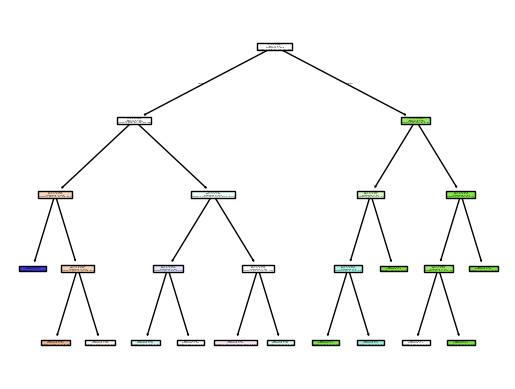

Misclassification samples: 40
20     False
278    False
136     True
191    False
71     False
       ...  
114     True
276     True
5      False
156     True
6      False
Name: M, Length: 85, dtype: bool
Accuracy: 0.529


In [18]:
# The scikit-learn tree module is imported, which contains functions and classes to work with 
# with decision trees.
from sklearn import tree

# A list called feature_names is created that contains the names of the features that were used 
# to train the model. These names correspond to the measurements of the flowers in the data set,
# probably the Iris data set.
feature_names = ['V', 'H', 'S']

# The plot_tree function is called to display the decision tree represented by tree_model.
# * tree_model
# The decision tree model that was pre-trained.
# * feature_names=feature_names
# Feature names are passed to appear on the graph, making it easier the interpretation of the tree.
# * filled=True
# This parameter indicates that the nodes should be filled with colors based on the predicted 
# classes, which helps visualize the decision tree more clearly.
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)

# The commented line (plt.savefig(...)) suggests that the graph could be saved as a file PDF if
# uncommented.
# plt.show() is used to display the graph on the screen, allowing users display the decision tree.
plt.show()

y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

# Random Forests

In [19]:
# The RandomForestClassifier class is imported from the ensemble module of scikit-learn. 
# This classifier uses multiple decision trees to improve accuracy and reduce 
# overfitting.
from sklearn.ensemble import RandomForestClassifier

# An object of the RandomForestClassifier class called forest is instantiated.
# * n_estimators=25
# This parameter indicates that 25 decision trees will be created in the forest. More trees 
# They generally improve model accuracy, but increase training time.
# * random_state=1
# A random seed is set to ensure the reproducibility of the results; 
# that is, the model will produce the same results every time it is run with this seed.
# * n_jobs=2
# This parameter allows using 2 processing cores to train the model in 
# parallel, which can speed up the process, especially with a large data set.
forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1,
                                n_jobs=2)

# The forest model is trained using the training data X_train (features) and 
# y_train (tags or classes).
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % forest.score(X_test, y_test))

Misclassification samples: 43
20     False
278     True
136     True
191     True
71     False
       ...  
114     True
276    False
5      False
156     True
6      False
Name: M, Length: 85, dtype: bool
Accuracy: 0.494


# KNN (K-Nearest Neighbors)

In [20]:
# The KNeighborsClassifier class is imported from the neighbors module of scikit-learn, which is used 
# to create a classification model based on the KNN algorithm.
from sklearn.neighbors import KNeighborsClassifier

# An object of the KNeighborsClassifier class called knn is instantiated with the following 
# parameters:
# * n_neighbors=5
# This parameter indicates that the model will consider the 5 nearest neighbors when performing the 
# classification.
# * p=2
# This parameter specifies the distance to use. With p=2, the distance is used 
# Euclidean (which is a form of the Minkowski metric).
# * metric='minkowski'
# It is defined that the metric used to calculate the distance between points will be the metric 
# of Minkowski.
knn = KNeighborsClassifier(n_neighbors=2, 
                           p=2, 
                           metric='minkowski')

# The knn model is trained using the training data X_train_std (features 
# standardized) and y_train (tags or classes). In the context of KNN, no 
# explicit training, but training data information is stored for 
# future classification.
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % knn.score(X_test_std, y_test))

# from sklearn.metrics import accuracy_score
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassification samples: 43
20     False
278    False
136     True
191     True
71     False
       ...  
114     True
276    False
5      False
156     True
6       True
Name: M, Length: 85, dtype: bool
Accuracy: 0.494


# Summary

---

Readers may ignore the next cell.

In [21]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# python script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex02.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex02.ipynb.
# * --output ex02.py
# This option tells the script to save the output (the converted file) with the name
# ex02.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex02.ipynb --output ex02.py

[NbConvertApp] Converting notebook ex02.ipynb to script
[NbConvertApp] Writing 20323 bytes to ex02.py
